<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final Project - Programming for Data Science
    <div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
    @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 3.2 - Exploratory data analysis
</div>

In [1]:
# import library
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
processed_df = pd.read_csv('./../data/Processed.csv', index_col=0)

In [3]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_number          2747 non-null   int64  
 1   quantity_ordered      2747 non-null   int64  
 2   price_per_unit        2747 non-null   float64
 3   orderline_number      2747 non-null   int64  
 4   sales                 2747 non-null   float64
 5   order_date            2747 non-null   object 
 6   days_since_lastorder  2747 non-null   int64  
 7   status                2747 non-null   object 
 8   productline           2747 non-null   object 
 9   retail_price          2747 non-null   int64  
 10  product_code          2747 non-null   object 
 11  customer_name         2747 non-null   object 
 12  phone                 2747 non-null   object 
 13  address               2747 non-null   object 
 14  city                  2747 non-null   object 
 15  postalcode            2747

### Q4: Sự chêch lệch giữa giá niêm yết (MSPR) và giá thực sự bán ra có ảnh hưởng đến doanh thu?

Trả lời câu hỏi giúp:
- Nhà sản xuất có thể điều chỉnh chiến lược giá để tối ưu hóa doanh thu. Điều này có thể bao gồm xem xét giảm giá hoặc tăng giá trong các trường hợp cụ thể để đạt được hiệu suất kinh doanh tốt nhất
- Phân tích giá có thể giúp nhà sản xuất hiểu rõ mức độ nhạy cảm của khách hàng đối với sự chênh lệch giá. Có thể có các nhóm khách hàng có xu hướng phản ứng mạnh mẽ hơn hoặc yếu đối với sự biến động giá.

#### Xử lý - Phân tích
- Tính độ chênh lệch giữa giá bán và giá gốc.
- Chia thành các bin để tính số lượng và doanh thu tương ứng với mỗi bin.

In [4]:
processed_df["price_diff"] = processed_df["price_per_unit"] - processed_df["retail_price"]

# Phân loại các khoảng chênh lệch giá và tính tổng doanh thu và số lượng sản phẩm bán ra cho mỗi bin
price_diff_bins = np.arange(-200, 250, 50)

# Categorize price differences into bins
processed_df['price_diff_bins'] = pd.cut(processed_df['price_diff'], bins=price_diff_bins)

# Group by bins and calculate sum for quantity sold and sales
price_diff_stats = processed_df.groupby('price_diff_bins').agg({'quantity_ordered': 'sum', 'sales': 'sum'}).reset_index()
price_diff_stats

/tmp/ipykernel_78099/2616860101.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_diff_stats = processed_df.groupby('price_diff_bins').agg({'quantity_ordered': 'sum', 'sales': 'sum'}).reset_index()


,price_diff_bins,quantity_ordered,sales
0,"(-200, -150]",48,2513.28
1,"(-150, -100]",659,45364.88
2,"(-100, -50]",2535,164304.65
3,"(-50, 0]",44591,4054650.18
4,"(0, 50]",45774,5035142.18
5,"(50, 100]",1751,250655.93
6,"(100, 150]",840,155704.08
7,"(150, 200]",197,43541.82


#### Visualize

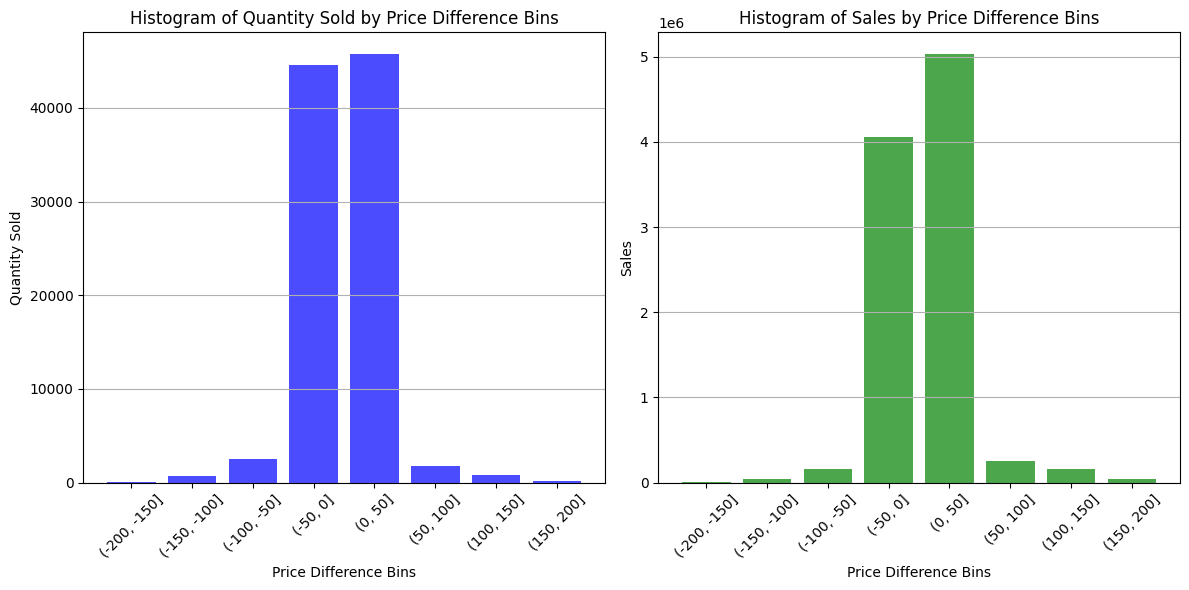

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Sales
ax[0].bar(price_diff_stats['price_diff_bins'].astype(str), price_diff_stats['quantity_ordered'], color='blue', alpha=0.7)
ax[0].set_xlabel('Price Difference Bins')
ax[0].set_ylabel('Quantity Sold')
ax[0].set_title('Histogram of Quantity Sold by Price Difference Bins')
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(True, axis='y')

# Histogram for Sales
ax[1].bar(price_diff_stats['price_diff_bins'].astype(str), price_diff_stats['sales'], color='green', alpha=0.7)
ax[1].set_xlabel('Price Difference Bins')
ax[1].set_ylabel('Sales')
ax[1].set_title('Histogram of Sales by Price Difference Bins')
ax[1].tick_params(axis='x', rotation=45)
ax[1].grid(True, axis='y')

plt.tight_layout()
plt.show()


Nhận xét:
- Khách hàng có xu hướng khá nhạy cảm với giá
- Giá bán ra lớn hơn từ 50 đô trở đi cho sản phẩm làm người mua ngại bỏ ra số tiền của họ.
- Với giá cả quá thấp so với giá niêm yết, có thể đó là những sản phẩm out-dated nên không có được sức mua mạnh mẽ từ người dùng.

**→ Khách hàng có xu hướng mua mạnh khi chêch lệch giữa giá niêm yết và giá bán thực tế không quá nhiều:** mức độ chêch lệch khoảng 50 đô.





Tiếp theo, ta tìm hiểu thời gian mà doanh số tăng mạnh
- Giúp nhà sản xuất có thể dựa vào đó để có các chiến lược định giá, thu hút khách hàng

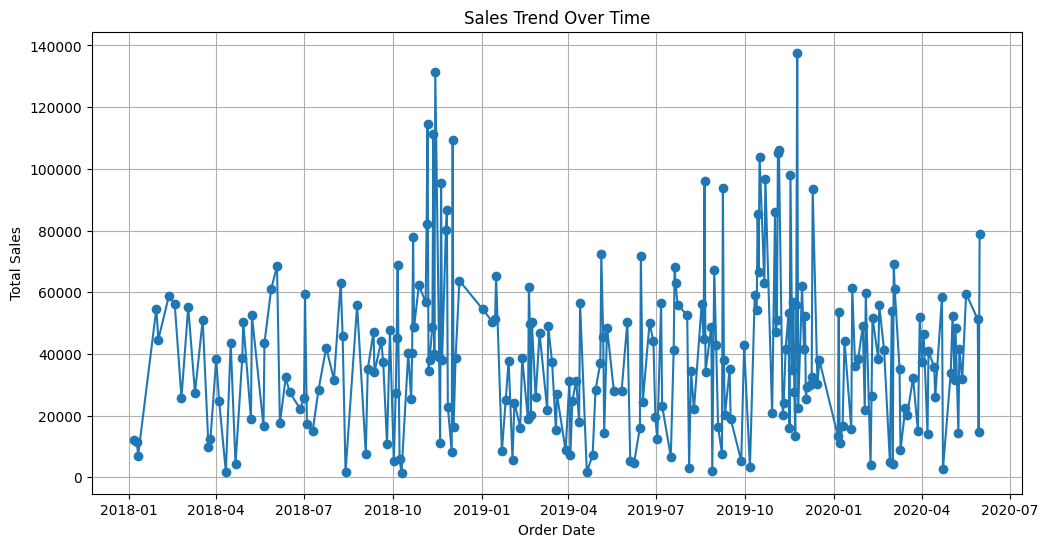

In [6]:

processed_df['order_date'] = pd.to_datetime(processed_df['order_date'])

sales_by_date = processed_df.groupby('order_date')['sales'].sum()

plt.figure(figsize=(12, 6))
plt.plot(sales_by_date.index, sales_by_date.values, marker='o', linestyle='-')
plt.title('Sales Trend Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

Từ biểu đồ, ta thấy được khoảng thời gian số lượng đặt hàng tăng mạnh là tầm khoảng tháng 10-12 hằng năm. Bởi lúc đó là dịp cuối năm, có nhiều đợt sale và lễ như Black Friday, Christmas...

**-> Nhà sản xuất nên tận dụng các dịp lễ, giáng sinh để điều chỉnh giá cả hợp lý, kích thích nhu cầu của khách hàng**


### Q5: Dựa trên phân loại khách hàng, cho biết sản phẩm được yêu thích bởi các nhóm khách hàng khác nhau?

#### Tiền xử lý: Phân loại khách hàng dựa trên RFM 
- recency: Ngày mua hàng gần đây nhất
- frequency: Tần suất mua hàng trong khoảng thời gian xác định
- monetary: Tổng chi tiêu mà khách hàng đã bỏ ra


In [7]:
# chọn mốc thời gian '2020-9-30'  làm time stone vì đó là cuối quý 3 năm 2020
timestone = '2020-9-30'

processed_df['order_date'] = pd.to_datetime(processed_df['order_date'], dayfirst=True)

# Recency
processed_df['Recency'] = (pd.to_datetime(timestone) - processed_df['order_date']).dt.days 

# Frequency
frequency = processed_df.drop_duplicates(subset= 'order_number').groupby('customer_name')['order_number'].count().reset_index(name='Frequency')

# Monetary
monetary = processed_df.groupby('customer_name')['sales'].sum().reset_index(name='Monetary')

# merge 3 columns and customer
rfm = frequency.merge(monetary, on='customer_name')
rfm = rfm.merge(processed_df[['customer_name', 'Recency']], on='customer_name')

rfm_segment = rfm.groupby('customer_name').agg({'Frequency': 'mean', 'Monetary': 'sum', 'Recency': 'min'}).reset_index()

rfm_segment


,customer_name,Frequency,Monetary,Recency
0,"AV Stores, Co.",3.0,8048198.31,318
1,Alpha Cognac,3.0,1409768.80,186
2,Amica Models & Co.,2.0,2447048.76,387
3,"Anna's Decorations, Ltd",4.0,7083821.98,205
4,Atelier graphique,3.0,169259.72,310
...,...,...,...,...
84,"Vida Sport, Ltd",2.0,3649120.36,397
85,Vitachrome Inc.,3.0,2201031.50,330
86,"Volvo Model Replicas, Co",4.0,1439342.72,316
87,West Coast Collectables Co.,2.0,599100.32,610


#### Để phân loại khách hàng, ta vẽ biểu đồ để trực quan về các số liệu `Recency`, `Monetary`, `Frequency`

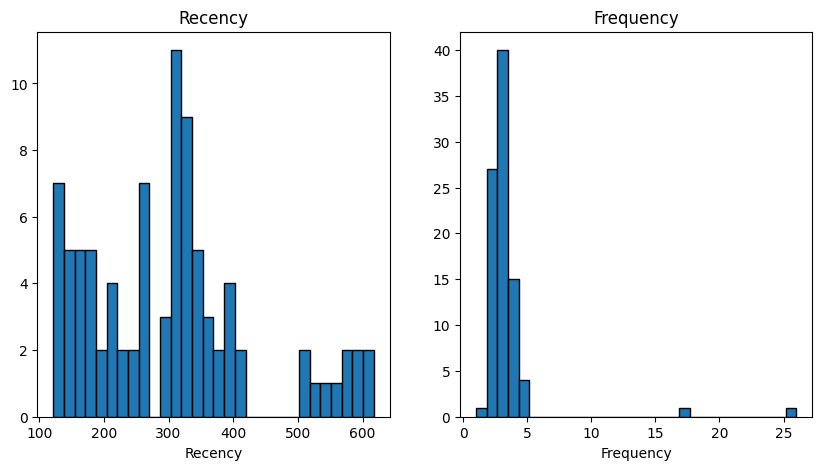

In [8]:
cols = ['Recency', 'Frequency']
# Plot histograms
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

for i, col in enumerate(cols):
    ax[i].hist(rfm_segment[col], bins=30, edgecolor='black')
    ax[i].set_xlabel(col)
    ax[i].set_title(f'{col}')
    

plt.show()

Từ biểu đồ, ta có các ngưỡng để phân loại khách hàng:
- `Recency`: Lựa chọn ngưỡng là 500 dựa trên 2 yếu tố:

    - 500 tương đương với một năm rưỡi mà khách hàng không quay lại
    - Dựa vào biểu đồ
            
-  `Frequecy`: Tần số quay lại trên 15 là tiêu chí cho khách hàng quan trọng


In [9]:
def segment(row):
    if (row['Recency']  <= 270 and row['Frequency'] >= 15) or row['Monetary'] >= rfm_segment['Monetary'].quantile(0.95):
        return 'Important Value Customer'
    elif row['Frequency'] <= 1 and row['Recency'] >= 500:
        return 'Low-Value Customer'
    else:
        return 'General Value Customer'
    
print("Phân loại khách hàng")
rfm_segment['Segment'] = rfm_segment.agg(segment, axis=1)
rfm_segment['Segment'].value_counts().to_frame().reset_index()

Phân loại khách hàng


,Segment,count
0,General Value Customer,84
1,Important Value Customer,5


In [10]:
merge_df = processed_df.merge(rfm_segment[['Segment', 'customer_name']], on='customer_name')
merge_df

,order_number,quantity_ordered,price_per_unit,orderline_number,sales,order_date,days_since_lastorder,status,productline,retail_price,...,city,postalcode,country,last_name,first_name,deal_size,price_diff,price_diff_bins,Recency,Segment
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,...,NYC,10022,USA,Yu,Kwai,Small,0.70,"(0, 50]",949,General Value Customer
1,10329,42,104.67,1,4396.14,2019-11-15,216,Shipped,Motorcycles,95,...,NYC,10022,USA,Yu,Kwai,Medium,9.67,"(0, 50]",320,General Value Customer
2,10107,39,99.91,5,3896.49,2018-02-24,878,Shipped,Motorcycles,118,...,NYC,10022,USA,Yu,Kwai,Medium,-18.09,"(-50, 0]",949,General Value Customer
3,10329,20,158.80,2,3176.00,2019-11-15,266,Shipped,Motorcycles,118,...,NYC,10022,USA,Yu,Kwai,Medium,40.80,"(0, 50]",320,General Value Customer
4,10107,27,224.65,4,6065.55,2018-02-24,902,Shipped,Motorcycles,193,...,NYC,10022,USA,Yu,Kwai,Medium,31.65,"(0, 50]",949,General Value Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10290,45,114.92,1,5171.40,2019-09-07,2289,Shipped,Vintage Cars,97,...,Brickhaven,58339,USA,Taylor,Leslie,Medium,17.92,"(0, 50]",389,General Value Customer
2743,10352,23,102.29,3,2352.67,2019-12-03,2660,Shipped,Ships,90,...,Brickhaven,58339,USA,Taylor,Leslie,Small,12.29,"(0, 50]",302,General Value Customer
2744,10352,49,100.72,2,4935.28,2019-12-03,2687,Shipped,Planes,99,...,Brickhaven,58339,USA,Taylor,Leslie,Medium,1.72,"(0, 50]",302,General Value Customer
2745,10352,22,75.51,1,1661.22,2019-12-03,2869,Shipped,Planes,74,...,Brickhaven,58339,USA,Taylor,Leslie,Small,1.51,"(0, 50]",302,General Value Customer


#### Visualize
- Dùng group bar chart để minh họa số lượng sản phẩm bán ra bởi hai tệp khách hàng.

/home/nguyennt/miniconda3/envs/min_ds-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nguyennt/miniconda3/envs/min_ds-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nguyennt/miniconda3/envs/min_ds-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nguyennt/miniconda3/envs/min_ds-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

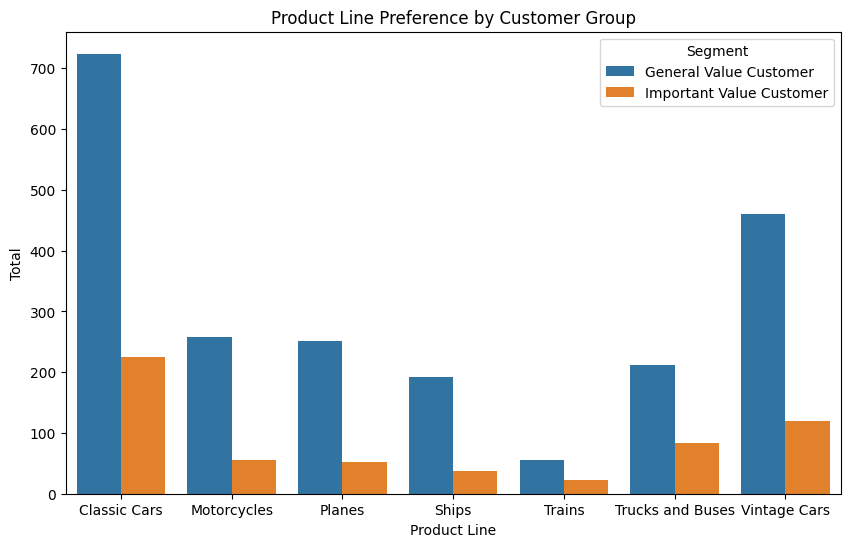

In [11]:
import seaborn as sns
product_line_totals = merge_df.groupby(['Segment', 'productline']).size().reset_index(name='Total')

plt.figure(figsize=(10, 6))
sns.barplot(x='productline', y='Total', hue='Segment', data=product_line_totals)
plt.title('Product Line Preference by Customer Group')
plt.xlabel('Product Line')
plt.ylabel('Total')
plt.show()

Nhận xét:
- Hầu hết ở cả hai nhóm khách hàng đều có sự yêu thích các loại sản phẩm giống nhau
- Tuy số lượng khách hàng quan trọng và khách hàng thường có sự chêch lệch đáng kể (1:18) nhưng sức mua hàng của khách hàng quan trọng xấp xỉ 1/3 lượng mua hàng của nhóm khách hàng thường
→ Nhà sản xuất cần có các chiến lược để thu hút các khách hàng quan trọng.


#### Để thấy được tỉ lệ yêu thích của khách hàng với từng loại sản phẩm, ta sẽ dùng pie chart để hiển thị


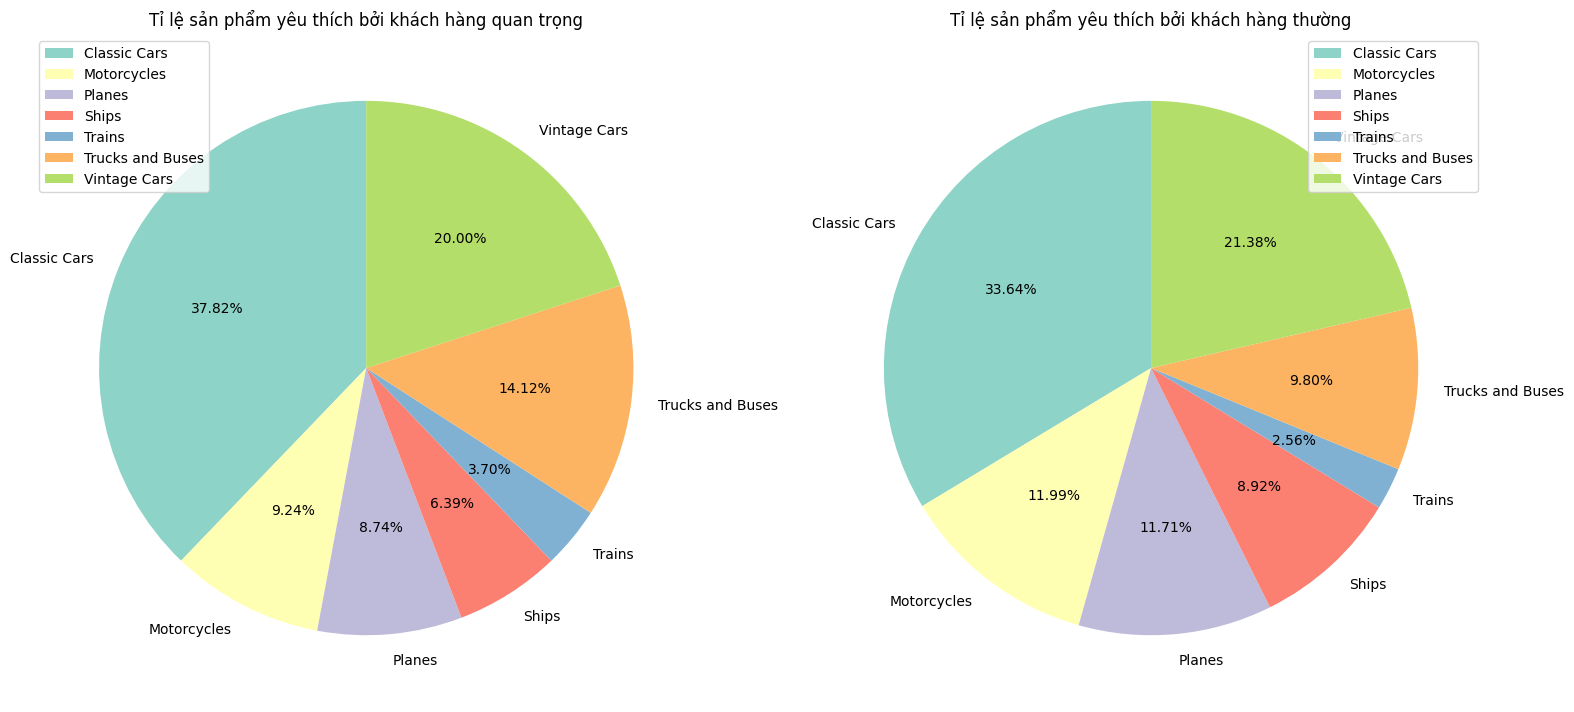

In [12]:
important = product_line_totals[product_line_totals['Segment'] == 'Important Value Customer']
general = product_line_totals[product_line_totals['Segment'] == 'General Value Customer']

kwrangs = {
    'autopct': '%1.2f%%',
    'startangle': 90,
    'colors': sns.color_palette('Set3'),
}

# Pie chart cho nhóm Khách hàng quan trọng
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.pie(important['Total'], labels=important['productline'], **kwrangs)
plt.title('Tỉ lệ sản phẩm yêu thích bởi khách hàng quan trọng')
plt.legend()

# Pie chart cho nhóm Khách hàng thường
plt.subplot(1, 2, 2)
plt.pie(general['Total'], labels=general['productline'], **kwrangs)
plt.title('Tỉ lệ sản phẩm yêu thích bởi khách hàng thường')
plt.legend()

plt.tight_layout()
plt.show()

Nhận xét:
- Cả hai nhóm khách hàng đều có sở thích tương đồng với nhau
- Đặc biệt mặt hàng Classic Cars và Vintage Cars rất được ưa chuộng.

### Q6: Khách hàng thường có xu hướng mua các dòng sản phẩm nào cùng nhau?

Trả lời câu hỏi này giúp:
- Nhà sản xuất có thể điều chỉnh chiến lược tiếp thị bằng cách đặt chú ý và quảng cáo chúng cùng một lúc để tăng cơ hội được chú ý.
- Công ty nắm được xu thế mua sắm của khách hàng, dự đoán được các mặt hàng được mua cùng nhau sẽ giúp công ty có thể quản lý hàng tồn kho một cách tốt hơn.
- Làm mới sản phẩm: vào các dịp đặc biệt nhà sản xuất có thể phát hành các bộ sưu tập phiên bản giới hạn nhằm kích cầu người tiêu dùng.

#### Tiền xử lý: Trích xuất các dòng sản phẩm trong từng hóa đơn.

In [13]:
line_df = processed_df.groupby(['order_number'])['productline'].agg([set])
line_df.reset_index(level= 0 ,inplace=True)
line_df.drop(['order_number'], axis=1, inplace=True)
line_df.columns = ['productline']
line_df

,productline
0,{Vintage Cars}
1,{Vintage Cars}
2,{Vintage Cars}
3,"{Classic Cars, Trucks and Buses, Vintage Cars}"
4,"{Classic Cars, Trucks and Buses, Trains}"
...,...
293,{Vintage Cars}
294,{Vintage Cars}
295,{Vintage Cars}
296,"{Classic Cars, Trucks and Buses, Vintage Cars}"


#### Phân tích: 
- Tạo dataframe với index các dòng, các cột là `productline`
- Giá trị mỗi ô chính là số lần hai sản phẩm xuất hiện trong cùng một đơn hàng.

In [14]:
cols = line_df['productline'].explode().unique()
product_combinations = {}

for product_line_set in line_df['productline']:
    products = list(product_line_set)
    if len(products) == 0: continue
    for i in range(len(products) - 1):
        for j in range(i + 1, len(products)):
            combination = (products[i], products[j])
            product_combinations[combination] = product_combinations.get(combination, 0) + 1
            combination = (products[j], products[i])
            product_combinations[combination] = product_combinations.get(combination, 0) + 1

product_combinations_df = pd.DataFrame(index=cols, columns=cols, data=0)

for combination, count in product_combinations.items():
    product_combinations_df.at[combination[0], combination[1]] = count
    product_combinations_df.at[combination[1], combination[0]] = count


#### Visualize

/home/nguyennt/miniconda3/envs/min_ds-env/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


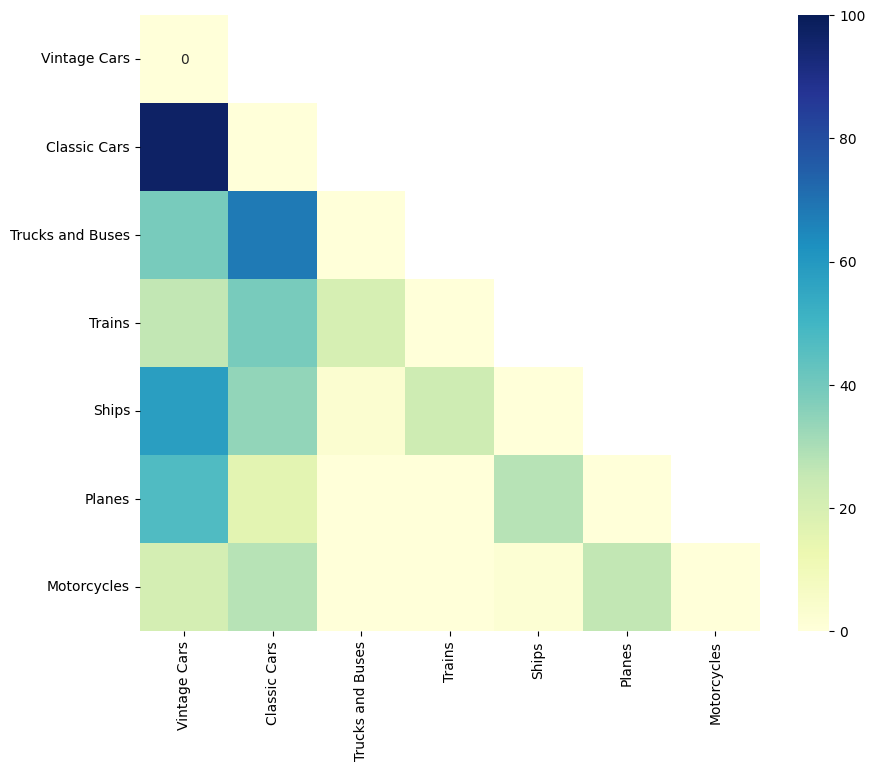

In [15]:
plt.figure(figsize = (10,8))
mask = np.triu(np.ones_like(product_combinations_df), k = 1)
sns.heatmap(product_combinations_df, annot = True, fmt = 'd', cmap="YlGnBu", mask = mask, vmin = 0, vmax = 100)
plt.show()

#### Nhận xét:


Từ biểu đồ
- Phần lớn các đơn hàng đều có sự xuất hiện của dòng Vintage Cars. Điều này cũng cho thấy được mối quan tâm rất lớn đối với dòng sản phẩm này.
- Classic Cars và Vintage Cars là dòng sản phẩm có tần số xuất hiện cùng nhau cao nhất, Classic Cars và Trucks and Bus đứng thứ hai. Cho thấy được xu hướng mua hàng: Khách hàng quan tâm đến các dòng xe hơi thì cũng quan tâm đễn các xe bus.
- Motocryles là sản phẩm ít được đặt chung với các sản phẩm khác. Nguyên nhân có thể là do khách hàng chỉ quan tâm đến dòng sản phẩm đặc thù. Ví dụ như máy bay, tàu thủy, xe mô tô (xe 2 bánh) nên không chuộng thêm các dòng sản phẩm khác.